### 
1.	A cloth manufacturing company is interested to know about the different attributes contributing to high sales. Build a decision tree & random forest model with Sales as target variable (first convert it into categorical variable).


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\decision tree and random forest\Company_Data.csv")

In [4]:
data.isnull().sum()
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
lb = LabelEncoder()

In [6]:
data["ShelveLoc"] = lb.fit_transform(data["ShelveLoc"])
data["Urban"] = lb.fit_transform(data["Urban"])
data["US"] = lb.fit_transform(data["US"])

{'whiskers': [<matplotlib.lines.Line2D at 0x234855f74c0>,
 'caps': [<matplotlib.lines.Line2D at 0x234855f7b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x234855f7070>],
 'medians': [<matplotlib.lines.Line2D at 0x23485604280>],
 'fliers': [<matplotlib.lines.Line2D at 0x23485604610>],
 'means': []}

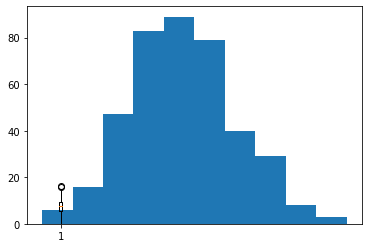

In [7]:
import matplotlib.pyplot as plt
plt.hist(data.Sales)
plt.boxplot(data.Sales)

In [8]:
high = []
t= data.Sales.tolist()
for i in range(0,400):
    if t[i]>=10:
        value=1
    else:
        value=0
        high.append(value)
        #print(high)


In [9]:
df= pd.DataFrame(high)
data['high']=df

In [10]:
data['high'].unique()
data['high'].value_counts()

0.0    321
Name: high, dtype: int64

In [11]:
colnames= list(data.columns)


In [12]:
data=data.drop(['Sales'],axis=1)

In [13]:
predictors=colnames[1:11]
target=colnames[10]

In [14]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)


In [15]:
from sklearn.tree import DecisionTreeClassifier as DT

In [16]:

help(DT)
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

DecisionTreeClassifier(criterion='entropy')

In [17]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,48,0
1,0,72


In [18]:
np.mean(preds == test[target])

1.0

In [19]:
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

np.mean(preds == train[target])

1.0

### Divide the diabetes data into train and test datasets and build a Random Forest and Decision Tree model with Outcome as the output variable. 

In [21]:
data = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\decision tree and random forest\Diabetes.csv')

In [22]:

data.isnull().sum()

data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [23]:
lb = LabelEncoder()
data[' Class variable'] = lb.fit_transform(data[' Class variable'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23485bbf340>,
 'caps': [<matplotlib.lines.Line2D at 0x23485bbfa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23485baff40>],
 'medians': [<matplotlib.lines.Line2D at 0x23485bcc1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23485bcc550>],
 'means': []}

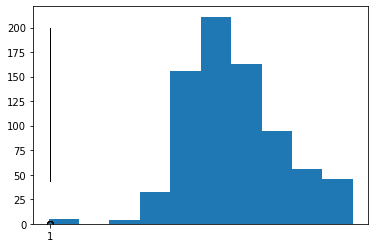

In [24]:
plt.hist(data[' Plasma glucose concentration']) #histogram
plt.boxplot(data[' Plasma glucose concentration']) #boxplot

In [25]:
data[' Class variable'].unique()
data[' Class variable'].value_counts()
colnames = list(data.columns)

In [26]:
predictors = colnames[:8]
target = colnames[8]

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)


In [28]:
from sklearn.tree import DecisionTreeClassifier as DT

In [29]:

help(DT)
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

DecisionTreeClassifier(criterion='entropy')

In [30]:
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,118,39
1,29,45


In [31]:
np.mean(preds == test[target]) # Test Data Accuracy 

# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

np.mean(preds == train[target]) # Train Data Accuracy

1.0

### 3.	Build a Decision Tree & Random Forest model on the fraud data. Treat those who have taxable_income <= 30000 as Risky and others as Good (discretize the taxable 

In [32]:
fraud = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\decision tree and random forest\Fraud_check.csv")


In [34]:
fraud.isnull().sum()
fraud.columns


Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [35]:

lb = LabelEncoder()


In [36]:
fraud["Undergrad"] = lb.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"] = lb.fit_transform(fraud["Marital.Status"])
fraud["Urban"] = lb.fit_transform(fraud["Urban"])

In [37]:
fraud['Taxable.Income'].unique()
fraud['Taxable.Income'].value_counts()
colnames = list(fraud.columns)

In [38]:
predictors = colnames[1:10]
target = colnames[:10]

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fraud, test_size = 0.3)

In [40]:
help(DT)
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

DecisionTreeClassifier(criterion='entropy')

In [43]:
#Problem Statement: -
#In Recruitment domain, HR faces with the challenge of predicting if the candidate is faking his salary or the candidate is genuine. In order to do it manually, let us use our Machine Learning algorithm to correctly classify using Decision Tree and Random Forest. We have a scenario where, a candidate claims to have 5 years of experience and earning 70000 per month working as regional manager and the candidate is expecting more than his previous CTC. A sample data has been collected, find out the candidate claims are genuine or fake.
#Answer;-
df = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\decision tree and random forest\HR_DT.csv')
df.info()
df.columns

# Dummy variables
df.head()

# n-1 dummy variables will be created for n categories
df = pd.get_dummies(df, columns = ['Position of the employee'], drop_first = True)

df.head()
# Input and Output Split
predictors = df.loc[:, df.columns!=' monthly income of employee']
type(predictors)

target = df[' monthly income of employee']
type(target)

# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

# Train the Regression DT
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train, y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Measuring accuracy
from sklearn.metrics import mean_squared_error, r2_score

# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

# ---------------------------Pruning the Tree----------------------------------
# Pruning is performed because accuracy is very less
# Minimum observations at the internal node approach
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(x_train, y_train)


# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on test dataset
mean_squared_error(y_test, test_pred2)
r2_score(y_test, test_pred2)

# Error on train dataset
mean_squared_error(y_train, train_pred2)
r2_score(y_train, train_pred2)

regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on test dataset
mean_squared_error(y_test, test_pred3)
r2_score(y_test, test_pred3)

# measure of error on train dataset
mean_squared_error(y_train, train_pred3)
r2_score(y_train, train_pred3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


0.9944925032978371